# Gaussian Process for Regression 
   ### Ranjan Mishra

We will start with understanding the meaning of Gaussian Process and then apply it for regression probelm


Stochastic Process : Stochastic process is a collection of random variables X(t) where t is index set, ofet taken as time. But it is not always the case, it can be any set and this is will be important from our point of view.

Gussian Process : Gaussian Process is a stochastic process for which any finite collection of random variables have joint Gaussian distribution. 
If we consider { f(1), f(2), ......} as some stochastic process then e.g. f(1) has Gaussian distribution, f(1), f(2) together have joint Gaussian distribution, etc.

A Gaussian process can be completely described by its mean function and covariance function. 
    m(x) = E[f(x)]
    k(x,x') = cov(x,x') = E[(f(x)-m(x)) * (f(x')-m(x')]
    
    where m(x) is mean function and cov(x,x') is covariance function.
    
    and we can write that f(x) is drwan from Gaussian Process as below
        f(x) ~ GP( m(x), cov(x,x')
    
Note that we have taken the index set X, it can be any possible set, for example it can be R^d, which may be input space of the given dataset.

A simple example for GP is Bayesian Linear Regression, 

    f(x) = O(x)'w where w~ N(0, E) 
    so we can see that f(x) will have mean function m(x) = 0 for all x
    and covariance function(matrix) as O(x)'*E*O(x')
    and any collection of f(x1), f(x2), ... will be normally distributed with respective covariance matrix and mean 0.

Let us take k(x,x') and squared exponential i.e. k(x,x') = exp(-|x-x'|/2)

Simplest example of drawing a sample from the GP is to consider below, 
Choose number of input points and calculate covariance matrix, we might use the covariance as squared exponential and then genearate random gaussain vectors based on this covariance matrix and plot generated value as funcion of input.


In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [265]:
x = [i*0.1 for i in range(-100, 101, 1)]

In [266]:
#calculating covariance based on squared exponential function
cov = [[np.exp(-0.5*math.fabs(x[i]-x[j])) for i in range(len(x))] for j in range(len(x))]
mean = [0 for i in range(len(x))]

In [268]:
#draw sample vector from multivariate normal with mean and covariance as given above
f = np.random.multivariate_normal(mean, cov)

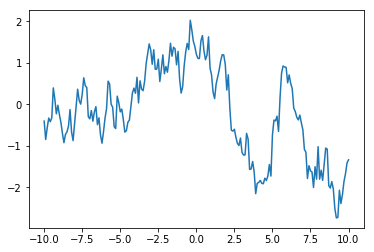

In [269]:
plt.plot(x,f)

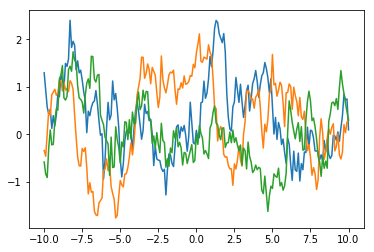

In [270]:
f1 = np.random.multivariate_normal(mean, cov)
f2 = np.random.multivariate_normal(mean, cov)
f3 = np.random.multivariate_normal(mean, cov)

plt.plot(x,f1)
plt.plot(x,f2)
plt.plot(x,f3)

## Prediction with noise free data

Let us assume that we have a obseravations such that y = f(x) and there are no noises involved. 
Assuming above prior that f ~ N(0, K(X,X)), we can say the prior distribution of joint f and f* is given by

    f    N ( 0, K)
    f*    
    
    where K is the matrix of the form | K(X,X)  K(X,X*)  |
                                      | K(X*,X) K(X*,X*) |
    
    for prediction purpose we can draw functions from above Gausssian process and discard those not following the given dataset. But this process is not computationally feasible. Better way is to consider conditioned f* on X*, f, X. It canbe easily seen that the conditional distribution can be given as below
    
    f* | X*, f, X ~ N( K(X*, X)*K(X,X)^-1 * f, K(X*,X*) - K(X*,X)*K(X,X)^-1 * K(X, X*))
    
    Now we can draw f* from above Gaussian process.

In [271]:
x_ = [i*0.1+0.03 for i in range(11, 151, 1)]

In [272]:
# Inference based on conditioned Process, to draw f* from condional GP,
# above we have taken x to vary from -5 to 5, we can include upto 10 and based on f, we do conditioning
f = np.array(f)
kxx = np.array(cov)
kx_x = np.array([np.exp(-0.5*math.fabs(x_[i]-x[j])) for i in range(len(x_)) for j in range(len(x))])
kx_x = kx_x.reshape((len(x_), len(x)))
kxx_ = kx_x.T
kx_x_ = np.array([np.exp(-0.5*math.fabs(x_[i]-x_[j])) for i in range(len(x_)) for j in range(len(x_))])
kx_x_ = kx_x_.reshape((len(x_), len(x_)))

In [273]:
mean_ = np.dot(kx_x, np.dot(np.linalg.inv(kxx), f))
cov_ = kx_x_ - np.dot(kx_x, np.dot( np.linalg.inv(kxx), kxx_))

In [274]:
ppp = mean_.reshape(mean_.shape[0])

In [275]:
f_ = np.random.multivariate_normal(ppp , cov_)

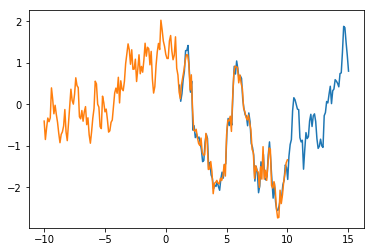

In [276]:
plt.plot(x_, f_)
plt.plot(x,f)

In [277]:
f_1 = np.random.multivariate_normal(ppp , cov_)
f_2 = np.random.multivariate_normal(ppp , cov_)
f_3 = np.random.multivariate_normal(ppp , cov_)
f_4 = np.random.multivariate_normal(ppp , cov_)
f_5 = np.random.multivariate_normal(ppp , cov_)

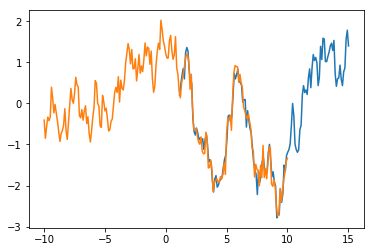

In [278]:
plt.plot(x_, f_1)
plt.plot(x,f)

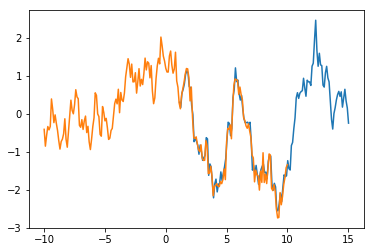

In [279]:
plt.plot(x_, f_2)
plt.plot(x,f)

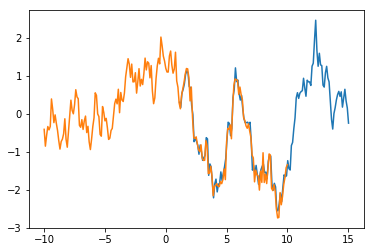

In [280]:
plt.plot(x_, f_2)
plt.plot(x,f)

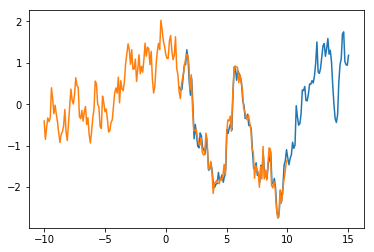

In [281]:
plt.plot(x_, f_3)
plt.plot(x,f)

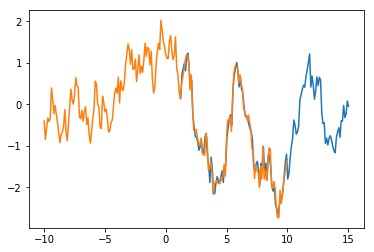

In [282]:
plt.plot(x_, f_4)
plt.plot(x,f)

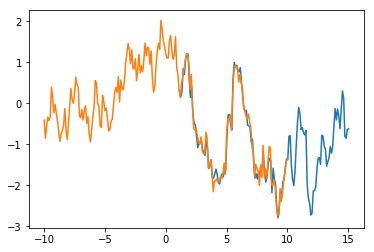

In [283]:
plt.plot(x_, f_5)
plt.plot(x,f)

## Regression for Noisy Data

### Ref : 1.Gassian Process for Machine Learning by Carl Eward Rusmusen and Christopher K.I. Williams, MIT Press.  Ref : 2.Gaussian Process by Takeyuki Hida and Masuyuki Histada, American Mathematical Society